In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure 
import operator
from operator import itemgetter
from heapq import nlargest
pd.options.mode.chained_assignment = None  # default='warn'

import wbgapi as wb


WORLD DATA

In [3]:
wb.source.info()
wb.series.info(q='income')
health_expend_data = wb.data.DataFrame('SH.XPD.CHEX.GD.ZS', ['ALL'], time=range(2012, 2021, 1), labels=True, skipAggs=False)
#health_expend_data
#Fill NULL values with zero(0)
health_expend_data = health_expend_data.fillna(0)
health_expend_data

,Country,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,
ZWE,Zimbabwe,6.918354,7.110148,8.133525,7.452066,7.675163,7.469752,8.680062,7.703565,0.0
ZMB,Zambia,3.930529,4.690910,3.829242,4.435102,4.477207,4.376977,5.032715,5.312203,0.0
YEM,"Yemen, Rep.",5.195936,4.960832,4.841805,4.252858,0.000000,0.000000,0.000000,0.000000,0.0
PSE,West Bank and Gaza,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
VIR,Virgin Islands (U.S.),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,6.541867,6.674307,6.577301,6.496499,6.593961,6.562004,6.574764,6.715267,0.0
CSS,Caribbean small states,5.087691,5.197799,5.275026,5.675563,5.978246,6.259914,6.155066,6.305645,0.0
ARB,Arab World,3.970690,4.218329,4.550951,5.073465,5.044954,5.280795,5.043366,5.083742,0.0


In [4]:
# File to Load (Remember to Change These)
cnt_list = []
file_to = "Resources/countries_list.csv"
write_to= "Resources/countries_out.csv"
c_list = pd.read_csv(file_to)

cnt_list = list(c_list['name'])

print (len(cnt_list))

245


In [5]:
#cnt_list1=[]
#Total population country wise from 2010 to 2020
cnt_pop_df = wb.data.DataFrame('SP.POP.TOTL', ['ALL'], time=range(2010, 2021, 1), labels=True, skipAggs=False)
#cnt_list1=list(df['Country'])
#print(cnt_list1)
cnt_pop_df = cnt_pop_df.fillna(0)
cnt_pop_df

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
ZWE,Zimbabwe,12697728.0,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0
ZMB,Zambia,13605986.0,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
YEM,"Yemen, Rep.",23154854.0,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
PSE,West Bank and Gaza,3786161.0,3882986.0,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0
VIR,Virgin Islands (U.S.),108357.0,108290.0,108188.0,108041.0,107882.0,107712.0,107516.0,107281.0,107001.0,106669.0,106290.0
...,...,...,...,...,...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,104421447.0,104174038.0,103935318.0,103713726.0,103496179.0,103257886.0,102994278.0,102740078.0,102538451.0,102398494.0,102172351.0
CSS,Caribbean small states,6973193.0,7022367.0,7072640.0,7123315.0,7173443.0,7222197.0,7269385.0,7314956.0,7358929.0,7401389.0,7442291.0
ARB,Arab World,354890097.0,363156846.0,371437642.0,379696477.0,387899835.0,396028301.0,404042892.0,411942825.0,419851989.0,427870273.0,436080728.0


In [6]:
#df = df[df.Country != cnt_list]
#df.Country.equals(cnt_list)

#Filtered countries list based on the countries_list.csv
cnt_final_df =cnt_pop_df[cnt_pop_df['Country'].isin(cnt_list)]
cnt_final_df

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
ZWE,Zimbabwe,12697728.0,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0
ZMB,Zambia,13605986.0,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
YEM,"Yemen, Rep.",23154854.0,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
VNM,Vietnam,87967655.0,88871384.0,89801926.0,90752593.0,91713850.0,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0
VEN,"Venezuela, RB",28439942.0,28887873.0,29360827.0,29781046.0,30042973.0,30081827.0,29851249.0,29402480.0,28887117.0,28515829.0,28435943.0
...,...,...,...,...,...,...,...,...,...,...,...,...
AND,Andorra,84454.0,83748.0,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0
ASM,American Samoa,56084.0,55755.0,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0
DZA,Algeria,35977451.0,36661438.0,37383899.0,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0


In [7]:
#GDP per capita country wise from 2010 to 2020
gdppercap=wb.data.DataFrame('NY.GDP.MKTP.CD', ['ALL'], time=range(2010, 2021, 1), labels=True, skipAggs=False)
#Fill NULL values with zero(0)
gdppercap = gdppercap.fillna(0)
gdppercap

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
ZWE,Zimbabwe,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,1.811554e+10,1.928429e+10,1.805117e+10
ZMB,Zambia,2.026556e+10,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10
YEM,"Yemen, Rep.",3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,0.000000e+00,0.000000e+00
PSE,West Bank and Gaza,9.681500e+09,1.118610e+10,1.220840e+10,1.351550e+10,1.398970e+10,1.397240e+10,1.540540e+10,1.612800e+10,1.627660e+10,1.713350e+10,1.556130e+10
VIR,Virgin Islands (U.S.),4.324000e+09,4.223000e+09,4.089000e+09,3.738000e+09,3.565000e+09,3.663000e+09,3.798000e+09,3.794000e+09,3.900000e+09,4.068000e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,1.318170e+12,1.449339e+12,1.353315e+12,1.422764e+12,1.465928e+12,1.293064e+12,1.321562e+12,1.464533e+12,1.645463e+12,1.673863e+12,1.653248e+12
CSS,Caribbean small states,6.452445e+10,6.966827e+10,7.205112e+10,7.334541e+10,7.447092e+10,7.324330e+10,6.959870e+10,7.169363e+10,7.531283e+10,7.617367e+10,6.603933e+10
ARB,Arab World,2.311237e+12,2.501780e+12,2.740553e+12,2.799579e+12,2.831681e+12,2.463580e+12,2.411981e+12,2.466443e+12,2.730780e+12,2.776469e+12,2.447584e+12


In [8]:
#GDP per capita country wise from 2010 to 2020
gdppercap_Aus=wb.data.DataFrame('NY.GDP.MKTP.CD', ['AUS'], time=range(2010, 2021, 1), labels=True, skipAggs=False)
#Fill NULL values with zero(0)
gdppercap_Aus = gdppercap_Aus.fillna(0)
gdppercap_Aus

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
AUS,Australia,1.147589e+12,1.397908e+12,1.546509e+12,1.576335e+12,1.467505e+12,1.350534e+12,1.206685e+12,1.326883e+12,1.428530e+12,1.391953e+12,1.327836e+12


In [9]:
#5 Highest population countries
high_pop_cnt_list = []
highest_pop_countries = cnt_final_df.sort_values(['YR2010'], ascending=False).head(5)
high_pop_cnt_list = list(highest_pop_countries['Country'])
highest_pop_countries

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
CHN,China,1.337705e+09,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.410929e+09
IND,India,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09,1.295601e+09,1.310152e+09,1.324517e+09,1.338677e+09,1.352642e+09,1.366418e+09,1.380004e+09
USA,United States,3.093271e+08,3.115835e+08,3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315011e+08
IDN,Indonesia,2.418342e+08,2.451160e+08,2.484517e+08,2.518053e+08,2.551281e+08,2.583833e+08,2.615564e+08,2.646510e+08,2.676705e+08,2.706256e+08,2.735236e+08
BRA,Brazil,1.957136e+08,1.975145e+08,1.992873e+08,2.010359e+08,2.027637e+08,2.044718e+08,2.061631e+08,2.078338e+08,2.094693e+08,2.110495e+08,2.125594e+08


In [10]:
high_pop_cnt_gdp=gdppercap[gdppercap['Country'].isin(high_pop_cnt_list)]
high_pop_cnt_gdp

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
USA,United States,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.823830e+13,1.874508e+13,1.954298e+13,2.061186e+13,2.143322e+13,2.095303e+13
IDN,Indonesia,7.550942e+11,8.929691e+11,9.178699e+11,9.125241e+11,8.908148e+11,8.608542e+11,9.318774e+11,1.015619e+12,1.042272e+12,1.119091e+12,1.058424e+12
IND,India,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.701112e+12,2.870504e+12,2.660245e+12
CHN,China,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.472273e+13
BRA,Brazil,2.208838e+12,2.616157e+12,2.465228e+12,2.472819e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.877824e+12,1.444733e+12


In [11]:
highest_pop_countries['2011-2010'] = highest_pop_countries.YR2011 - highest_pop_countries.YR2010
highest_pop_countries['2012-2011'] = highest_pop_countries.YR2012 - highest_pop_countries.YR2011
highest_pop_countries['2013-2012'] = highest_pop_countries.YR2013 - highest_pop_countries.YR2012
highest_pop_countries['2014-2013'] = highest_pop_countries.YR2014 - highest_pop_countries.YR2013
highest_pop_countries['2015-2014'] = highest_pop_countries.YR2015 - highest_pop_countries.YR2014
highest_pop_countries['2016-2015'] = highest_pop_countries.YR2016 - highest_pop_countries.YR2015
highest_pop_countries['2017-2016'] = highest_pop_countries.YR2017 - highest_pop_countries.YR2016
highest_pop_countries['2018-2017'] = highest_pop_countries.YR2018 - highest_pop_countries.YR2017
highest_pop_countries['2019-2018'] = highest_pop_countries.YR2019 - highest_pop_countries.YR2018
highest_pop_countries['2020-2019'] = highest_pop_countries.YR2020 - highest_pop_countries.YR2019
highest_pop_countries['% change over 2011-2010'] = round((highest_pop_countries ['2011-2010'] / highest_pop_countries ['YR2011']) * 100, 2)
highest_pop_countries['% change over 2012-2011'] = round((highest_pop_countries ['2012-2011'] / highest_pop_countries ['YR2012']) * 100, 2)
highest_pop_countries['% change over 2013-2012'] = round((highest_pop_countries ['2013-2012'] / highest_pop_countries ['YR2013']) * 100, 2)
highest_pop_countries['% change over 2014-2013'] = round((highest_pop_countries ['2014-2013'] / highest_pop_countries ['YR2014']) * 100, 2)
highest_pop_countries['% change over 2015-2014'] = round((highest_pop_countries ['2015-2014'] / highest_pop_countries ['YR2015']) * 100, 2)
highest_pop_countries['% change over 2016-2015'] = round((highest_pop_countries ['2016-2015'] / highest_pop_countries ['YR2016']) * 100, 2)
highest_pop_countries['% change over 2017-2016'] = round((highest_pop_countries ['2017-2016'] / highest_pop_countries ['YR2017']) * 100, 2)
highest_pop_countries['% change over 2018-2017'] = round((highest_pop_countries ['2018-2017'] / highest_pop_countries ['YR2018']) * 100, 2)
highest_pop_countries['% change over 2019-2018'] = round((highest_pop_countries ['2019-2018'] / highest_pop_countries ['YR2019']) * 100, 2)
highest_pop_countries['% change over 2020-2019'] = round((highest_pop_countries ['2020-2019'] / highest_pop_countries ['YR2020']) * 100, 2)

highest_pop_countries

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,...,% change over 2011-2010,% change over 2012-2011,% change over 2013-2012,% change over 2014-2013,% change over 2015-2014,% change over 2016-2015,% change over 2017-2016,% change over 2018-2017,% change over 2019-2018,% change over 2020-2019
economy,,,,,,,,,,,,,,,,,,,,,
CHN,China,1.337705e+09,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,...,0.54,0.68,0.66,0.63,0.58,0.57,0.60,0.47,0.35,0.23
IND,India,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09,1.295601e+09,1.310152e+09,1.324517e+09,1.338677e+09,1.352642e+09,...,1.28,1.22,1.18,1.14,1.11,1.08,1.06,1.03,1.01,0.98
USA,United States,3.093271e+08,3.115835e+08,3.138777e+08,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,...,0.72,0.73,0.69,0.73,0.73,0.72,0.63,0.53,0.45,0.96
IDN,Indonesia,2.418342e+08,2.451160e+08,2.484517e+08,2.518053e+08,2.551281e+08,2.583833e+08,2.615564e+08,2.646510e+08,2.676705e+08,...,1.34,1.34,1.33,1.30,1.26,1.21,1.17,1.13,1.09,1.06
BRA,Brazil,1.957136e+08,1.975145e+08,1.992873e+08,2.010359e+08,2.027637e+08,2.044718e+08,2.061631e+08,2.078338e+08,2.094693e+08,...,0.91,0.89,0.87,0.85,0.84,0.82,0.80,0.78,0.75,0.71


AUSTRALIA DATA

In [12]:
historical_population_file = "Resources/historical_population_yearwise.csv"
historical_population_df = pd.read_csv(historical_population_file)
historical_population_df

,Year,Total Growth,Natural increase,Net overseas migration
0,2010,1325678,644081,761477
1,2011,1291032,623285,753801
2,2012,1572603,638448,931319
3,2013,1552788,645513,897384
4,2014,1395970,627564,756049
5,2015,1365365,605671,736070
6,2016,1533393,613713,875547
7,2017,1611578,582646,1024023
8,2018,1546863,576102,970761
9,2019,1546582,564920,981662


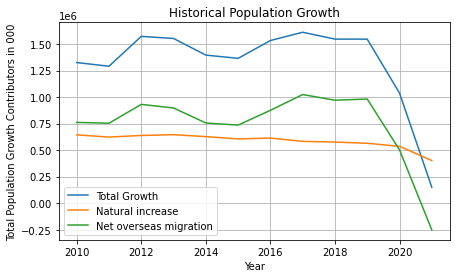

In [13]:
plt.figure(figsize=(7, 4))
plt.plot(historical_population_df['Year'], historical_population_df['Total Growth'], label="Total Growth") 
plt.plot(historical_population_df['Year'], historical_population_df['Natural increase'], label="Natural increase") 
plt.plot(historical_population_df['Year'], historical_population_df['Net overseas migration'], label="Net overseas migration") 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Total Population Growth Contributors in 000')

plt.title('Historical Population Growth')
plt.grid()
plt.show()

In [14]:
Australia_Migration_file = "Resources/Australia_Migration.csv"
Australia_Migration_df = pd.read_csv(Australia_Migration_file)
Australia_Migration_df

,Year,Net overseas migration,zero line
0,2010,196.06,0
1,2011,180.37,0
2,2012,231.95,0
3,2013,230.33,0
4,2014,187.78,0
5,2015,184.03,0
6,2016,206.23,0
7,2017,263.35,0
8,2018,238.22,0
9,2019,241.34,0


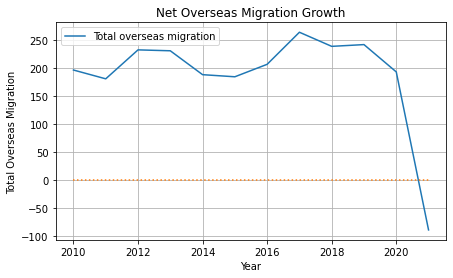

In [15]:
plt.figure(figsize=(7, 4))
plt.plot(Australia_Migration_df['Year'], Australia_Migration_df['Net overseas migration'], label="Total overseas migration") 
plt.plot(Australia_Migration_df['Year'], Australia_Migration_df['zero line'],linestyle= 'dotted') 

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Total Overseas Migration')


plt.title('Net Overseas Migration Growth')
plt.grid()
plt.show()

In [16]:
top_10_countries_migration_file = "Resources/top_10_countries_migration.csv"
top_10_countries_migration_df = pd.read_csv(top_10_countries_migration_file)
top_10_countries_migration_df


,Country,2010,2015,2020
0,England,985.09,1006.54,980.36
1,India,329.51,449.04,721.05
2,China(c),371.55,508.87,650.64
3,New Zealand,517.78,575.43,564.84
4,Philippines,183.77,241.13,310.05
5,Vietnam,203.77,235.59,270.34
6,South Africa,155.95,177.39,200.24
7,Italy,204.69,198.51,177.84
8,Malaysia,129.88,143.42,177.46
9,Sri Lanka,96.48,119.70,146.95


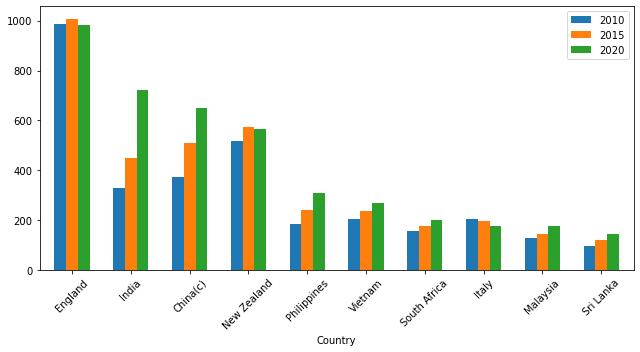

In [17]:
top_10_countries_migration_df.plot.bar(x='Country', figsize = (9, 5), width = 0.6, rot=45);
plt.tight_layout()

In [18]:
Births_registered_file = "Resources/Births_registered_yearwise.csv"

Births_registered_df = pd.read_csv(Births_registered_file)
Births_registered_df

,Year,Births registered
0,2010,303318
1,2011,301617
2,2012,309582
3,2013,308065
4,2014,299697
5,2015,305377
6,2016,311104
7,2017,309142
8,2018,315147
9,2019,305832


In [19]:
Deaths_registered_yearwise_file = "Resources/Deaths_registered_yearwise.csv"
Deaths_registered_yearwise_df = pd.read_csv(Deaths_registered_yearwise_file)
Deaths_registered_yearwise_df

,Year,Males,Females,Deaths Registered
0,2010,73484,69989,143473
1,2011,75330,71602,146932
2,2012,74794,72304,147098
3,2013,75782,71896,147678
4,2014,78341,75239,153580
5,2015,81330,77722,159052
6,2016,81867,76637,158504
7,2017,"82,858",78051,160909
8,2018,82320,76173,158493
9,2019,88346,80955,169301


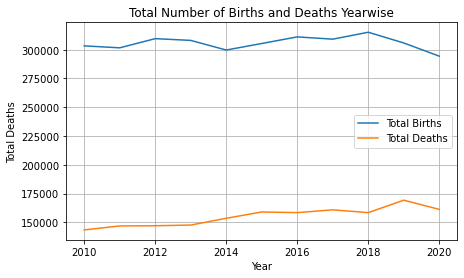

In [20]:
plt.figure(figsize=(7, 4))
plt.plot(Births_registered_df['Year'], Births_registered_df['Births registered'], label="Total Births") 
plt.plot(Deaths_registered_yearwise_df['Year'], Deaths_registered_yearwise_df['Deaths Registered'], label="Total Deaths") 
 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.ylabel('Total Deaths')

plt.title('Total Number of Births and Deaths Yearwise')
plt.grid()
plt.show()

In [21]:
Leading_causes_of_death_yearwise_file = "Resources/Leading_causes_of_death_yearwise.csv"
Leading_causes_of_death_yearwise_df = pd.read_csv(Leading_causes_of_death_yearwise_file)
Leading_causes_of_death_yearwise_df


,Year,Ischaemic heart diseases,"Dementia, including Alzheimer's disease",Cerebrovascular diseases,"Malignant neoplasm of trachea, bronchus and lung",Chronic lower respiratory diseases
0,2010,84.8,33.8,43.2,33.6,24.6
1,2011,81.2,35.8,42.0,32.6,25.6
2,2012,73.5,36.3,39.1,31.9,25.2
3,2013,70.2,37.2,37.0,31.3,26.4
4,2014,69.7,39.4,36.6,30.6,28.0
5,2015,67.0,40.5,35.9,30.7,27.8
6,2016,62.8,40.9,34.0,29.6,27.2
7,2017,59.8,41.6,32.2,28.0,27.6
8,2018,54.6,41.2,30.7,28.4,25.1
9,2019,55.5,43.0,29.6,28.3,25.9


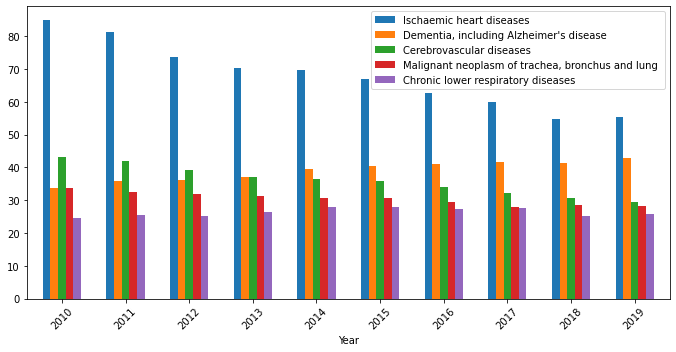

In [22]:
Leading_causes_of_death_yearwise_df.plot.bar(x='Year', figsize = (9.5, 5), width = 0.6, rot=45);
plt.tight_layout()

In [23]:
Projected_population_file = "Resources/Projected_population_australia.csv"
Projected_population_df = pd.read_csv(Projected_population_file)
Projected_population_df

,Year,High series,Medium series,Low series,Zero net overseas migration
0,2021,26402046,26301274,26200811,25190067
1,2022,26873947,26727025,26582009,25325761
2,2023,27349900,27147199,26949969,25454972
3,2024,27829520,27562195,27303910,25576973
4,2025,28311405,27970435,27643086,25691129
5,2026,28796151,28372315,27966732,25796865
6,2027,29283507,28765734,28273607,25893232
7,2028,29773492,29157085,28575391,25979797
8,2029,30264147,29545877,28872946,26056317
9,2030,30755046,29931725,29165889,26122837


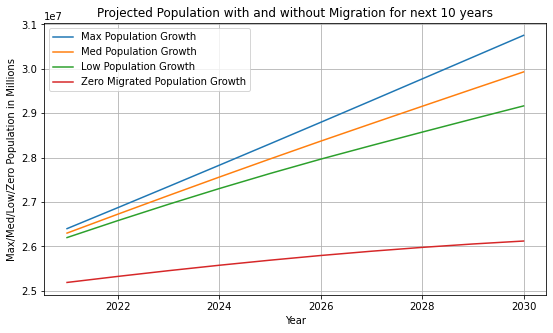

In [24]:
plt.figure(figsize=(9, 5))
plt.plot(Projected_population_df['Year'], Projected_population_df['High series'], label="Max Population Growth") 
plt.plot(Projected_population_df['Year'], Projected_population_df['Medium series'], label="Med Population Growth") 
plt.plot(Projected_population_df['Year'], Projected_population_df['Low series'], label="Low Population Growth")
plt.plot(Projected_population_df['Year'], Projected_population_df['Zero net overseas migration'], label="Zero Migrated Population Growth")
 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Max/Med/Low/Zero Population in Millions')

plt.title('Projected Population with and without Migration for next 10 years')
plt.grid()
plt.show()

In [25]:
projected_population_migration_file = "Resources/Contribution _of_overseas_migration_projected_population.csv"
projected_population_migration_df = pd.read_csv(projected_population_migration_file)
projected_population_migration_df

,Year,High series,Medium series,Low series
0,2021,1124000,1057000,990000
1,2022,1410000,1315000,1220000
2,2023,1694000,1566000,1439000
3,2024,1976000,1811000,1647000
4,2025,2255000,2049000,1844000
5,2026,2532000,2281000,2030000
6,2027,2807000,2506000,2205000
7,2028,3082000,2731000,2380000
8,2029,3357000,2956000,2555000
9,2030,3632000,3181000,2730000


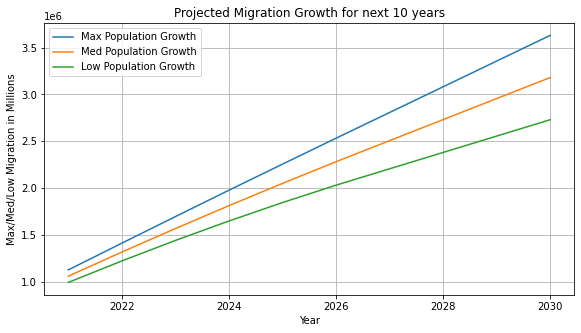

In [26]:
plt.figure(figsize=(9.5, 5))
plt.plot(projected_population_migration_df['Year'], projected_population_migration_df['High series'], label="Max Population Growth") 
plt.plot(projected_population_migration_df['Year'], projected_population_migration_df['Medium series'], label="Med Population Growth") 
plt.plot(projected_population_migration_df['Year'], projected_population_migration_df['Low series'], label="Low Population Growth")
 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Max/Med/Low Migration in Millions')

plt.title('Projected Migration Growth for next 10 years')
plt.grid()
plt.show()

In [27]:
Historical_GDP_Per_Capita_file = "Resources/Historical_GDP_Per_Capita.csv"
Historical_GDP_Per_Capita_df = pd.read_csv(Historical_GDP_Per_Capita_file)
Historical_GDP_Per_Capita_df

,Year,Annual Growth Rate,Zero
0,2010,21.63,0
1,2011,20.18,0
2,2012,8.79,0
3,2013,0.20,0
4,2014,-8.27,0
5,2015,-9.21,0
6,2016,-11.95,0
7,2017,8.12,0
8,2018,6.16,0
9,2019,-4.01,0


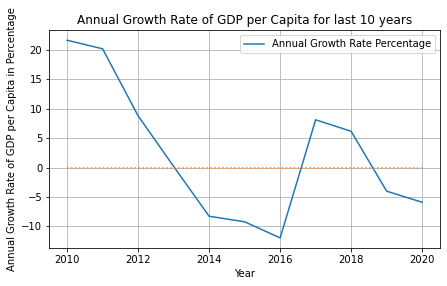

In [28]:
plt.figure(figsize=(7, 4))
plt.plot(Historical_GDP_Per_Capita_df['Year'], Historical_GDP_Per_Capita_df['Annual Growth Rate'], label="Annual Growth Rate Percentage") 
plt.plot(Historical_GDP_Per_Capita_df['Year'], Historical_GDP_Per_Capita_df['Zero'],linestyle= 'dotted') 

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate of GDP per Capita in Percentage')


plt.title('Annual Growth Rate of GDP per Capita for last 10 years')
plt.grid()
plt.show()

In [29]:
#Back up-------------------------------------------------------------------------------------------------
Overseas_migrant_arrivals_file = "Resources/Overseas_migrant_arrivals.csv"
Overseas_migrant_arrivals_df = pd.read_csv(Overseas_migrant_arrivals_file)
Overseas_migrant_arrivals_df

,Year,Temporary visa holders(b) ('000),Australian residents(b)(c) ('000),NZ citizens(d) ('000),Other ('000)
0,2010-11,202.57,159.17,53.61,16.44
1,2011-12,225.59,163.76,61.07,16.91
2,2012-13,244.06,163.85,54.12,20.06
3,2013-14,253.16,166.53,37.77,7.21
4,2014-15,262.93,163.17,31.75,7.40
5,2015-16,281.76,166.39,33.70,7.43
6,2016-17,314.81,185.48,32.33,7.53
7,2017-18,327.30,165.07,30.38,4.77
8,2018-19,350.67,164.29,30.54,4.90
9,2019-20,313.66,167.30,22.22,3.67


In [30]:
#Back Up--------------------------------------------------------------------------------------------------
Overseas_migrant_departures_file = "Resources/Overseas_migrant_departures.csv"
Overseas_migrant_departures_df = pd.read_csv(Overseas_migrant_departures_file)
Overseas_migrant_departures_df

,Year,Temporary visa holders(b) ('000),Australian residents(b)(c) ('000),NZ citizens(d) ('000),Other ('000)
0,2010-11,114.43,107.06,16.81,13.12
1,2011-12,109.58,101.78,16.38,7.65
2,2012-13,119.03,104.36,20.06,8.31
3,2013-14,127.76,111.87,25.30,11.97
4,2014-15,128.06,118.85,27.08,7.23
5,2015-16,129.27,118.28,27.64,7.86
6,2016-17,131.19,113.07,25.60,6.94
7,2017-18,143.52,110.39,22.91,12.48
8,2018-19,168.50,107.46,22.41,10.70
9,2019-20,196.78,84.84,20.85,11.69


COMPARING WORLD DATA TO AUSTRALIAN DATA

In [32]:
#GDP PER CAPITA

combined_data= high_pop_cnt_gdp.append(gdppercap_Aus)
combined_data

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
USA,United States,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.823830e+13,1.874508e+13,1.954298e+13,2.061186e+13,2.143322e+13,2.095303e+13
IDN,Indonesia,7.550942e+11,8.929691e+11,9.178699e+11,9.125241e+11,8.908148e+11,8.608542e+11,9.318774e+11,1.015619e+12,1.042272e+12,1.119091e+12,1.058424e+12
IND,India,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.701112e+12,2.870504e+12,2.660245e+12
CHN,China,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.472273e+13
BRA,Brazil,2.208838e+12,2.616157e+12,2.465228e+12,2.472819e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.877824e+12,1.444733e+12
AUS,Australia,1.147589e+12,1.397908e+12,1.546509e+12,1.576335e+12,1.467505e+12,1.350534e+12,1.206685e+12,1.326883e+12,1.428530e+12,1.391953e+12,1.327836e+12


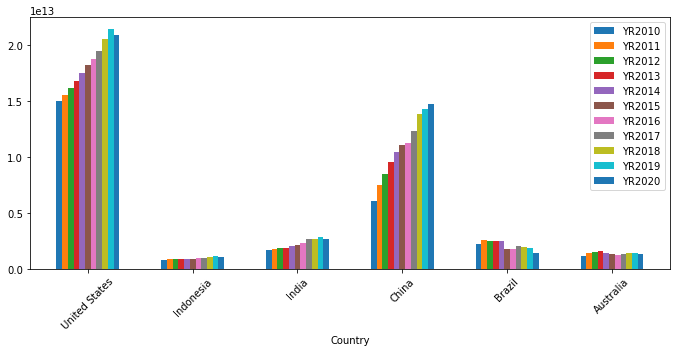

In [35]:
combined_data.plot.bar(x='Country', figsize = (9.5, 5), width = 0.6, rot=45);
plt.tight_layout()